# Scikit learn using Boston Housing Data #

In [52]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()
print(boston_dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


data: contains the information for various houses\
target: prices of the house\
feature_names: names of the 13 features\
DESCR: describes the dataset

In [44]:
boston_dataset.feature_names #The dataset contains 13 features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [51]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X, y = load_boston(return_X_y = True)
print('The shape of Dataframe is: ', X.shape) #The dataset contains 506 rows and 13 columns.
y.shape

## Data Analysis ##

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
pred_mod=model.predict(X)

Text(0, 0.5, 'True')

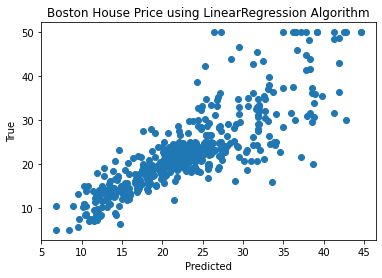

In [63]:
import matplotlib.pylab as plt
plt.scatter(pred_mod,y)
plt.title('Boston House Price using LinearRegression Algorithm')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0, 0.5, 'True')

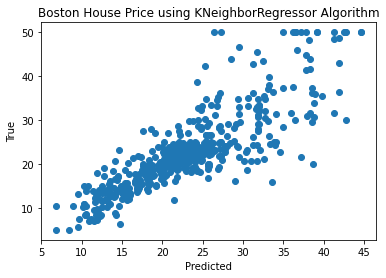

In [65]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X,y)
pred_mod=model.predict(X)

plt.scatter(pred_mod,y)
plt.title('Boston House Price using KNeighborRegressor Algorithm')
plt.xlabel('Predicted')
plt.ylabel('True')

## Use of Pipeline ##

Text(0, 0.5, 'True')

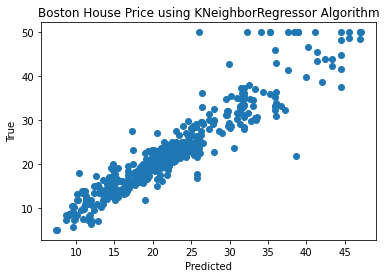

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X,y=load_boston(return_X_y = True)
pipeline_mod=Pipeline([
    ("scale",StandardScaler()),
    ("model", KNeighborsRegressor())
])
pipeline_mod.fit(X,y)
Pred_mod=pipeline_mod.predict(X)
plt.scatter(Pred_mod,y)
plt.title('Boston House Price using KNeighborRegressor Algorithm')
plt.xlabel('Predicted')
plt.ylabel('True')


## Using GridSearchCV ##

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X,y=load_boston(return_X_y = True)
pipeline_mod=Pipeline([
    ("scale",StandardScaler()),
    ("model", KNeighborsRegressor())
])
pipeline_mod.get_params()
mod = GridSearchCV(estimator=pipeline_mod,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);


In [59]:
import pandas as pd
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004983,0.004929,0.001321,0.000458,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.000998,0.000003,0.000996,0.000003,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.000997,0.000002,0.001335,0.000472,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000992,0.000009,0.001999,0.000007,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001012,0.000020,0.001331,0.000468,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000996,0.000002,0.001997,0.000002,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000997,0.000002,0.001661,0.000471,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001329,0.000471,0.001659,0.000467,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000985,0.000015,0.001679,0.000483,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001340,0.000473,0.002316,0.000435,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


### Reference
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155